<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-specification" data-toc-modified-id="Model-specification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model specification</a></span></li><li><span><a href="#Frequentist-approach" data-toc-modified-id="Frequentist-approach-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Frequentist approach</a></span><ul class="toc-item"><li><span><a href="#General-formula-for-calculating-the-Likelihood" data-toc-modified-id="General-formula-for-calculating-the-Likelihood-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>General formula for calculating the Likelihood</a></span></li><li><span><a href="#Likelihood-for-Linear-Regression" data-toc-modified-id="Likelihood-for-Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Likelihood for Linear Regression</a></span></li></ul></li><li><span><a href="#Bayesian-approach" data-toc-modified-id="Bayesian-approach-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bayesian approach</a></span><ul class="toc-item"><li><span><a href="#Maximum-a-Posteriori-for-Linear-Regression" data-toc-modified-id="Maximum-a-Posteriori-for-Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Maximum a Posteriori for Linear Regression</a></span></li><li><span><a href="#Predictions-from-Bayesian-models" data-toc-modified-id="Predictions-from-Bayesian-models-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Predictions from Bayesian models</a></span></li></ul></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementation</a></span><ul class="toc-item"><li><span><a href="#Setting-up-problem" data-toc-modified-id="Setting-up-problem-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setting up problem</a></span></li><li><span><a href="#Markov-chain-Monte-Carlo-(MCMC)" data-toc-modified-id="Markov-chain-Monte-Carlo-(MCMC)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Markov chain Monte Carlo (MCMC)</a></span><ul class="toc-item"><li><span><a href="#From-scratch-implementation-using-Metropolis-Sampler" data-toc-modified-id="From-scratch-implementation-using-Metropolis-Sampler-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>From scratch implementation using Metropolis Sampler</a></span></li><li><span><a href="#Visualization-of-MCMC-steps" data-toc-modified-id="Visualization-of-MCMC-steps-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Visualization of MCMC steps</a></span></li><li><span><a href="#Pymc3-implementation-using-No-U-Turn-Sampler" data-toc-modified-id="Pymc3-implementation-using-No-U-Turn-Sampler-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Pymc3 implementation using No-U-Turn Sampler</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from theano import shared, tensor as tt
import scipy as sp
import pandas as pd
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Model specification

Link: https://wso2.com/blog/research/part-two-linear-regression


Equation for a simple linear regression:
<font size="4">
$\begin{equation} \tag{1}
   y_i = \tau + W^T.x_i+ \epsilon_i
   \end{equation}$
</font>
where:<br><br>
$\quad\quad\quad \tau$ is the y-intercept<br><br>
$\quad\quad\quad W$ is the vector of weights of predictors<br><br>
$\quad\quad\quad \epsilon_i$ is the individual error to represent the real world data that does not fit exactly at the straight line


## Frequentist approach
Link: https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d

To find the optimal wegihts for equation (1) above, the most typical way is to do the maximum likelihood estimation (MLE) <=> minize the error $\sum_{i=1}^{N}\epsilon_i$ for N data points.

### General formula for calculating the Likelihood

<font size="4">
$\begin{equation} \tag{2}
   L(parameters|data)= P(data|parameters) = \prod_{i=1}^{N} f(data_i|parameters)
   \end{equation}$
</font><br><br>
where: <br><br>
$\quad\quad\quad f$ is a particular PDF function that is used to calculate the probability for every data point<br><br>
$\quad\quad\quad$ Equation (2) assumes that all the data points are independent -> joint probabilities of all data points == product of probability of each data point

### Likelihood for Linear Regression

Assume that every data point $d_i = (x_i, y_i)$ has its own mean ($\mu_i = W^Tx_i$)

And, all the data points shared the same normally distributed noise variation ($\epsilon$) which its mean == 0 and variance == $\sigma^2$ => $\epsilon \sim N(0, \sigma^2)$ 

$\rightarrow$ The probability of every data point $d_i$ can be expressed as <font size="3">$y_i \sim N(W^Tx_i, \sigma^2) \tag{figure for demonstration below}$</font>

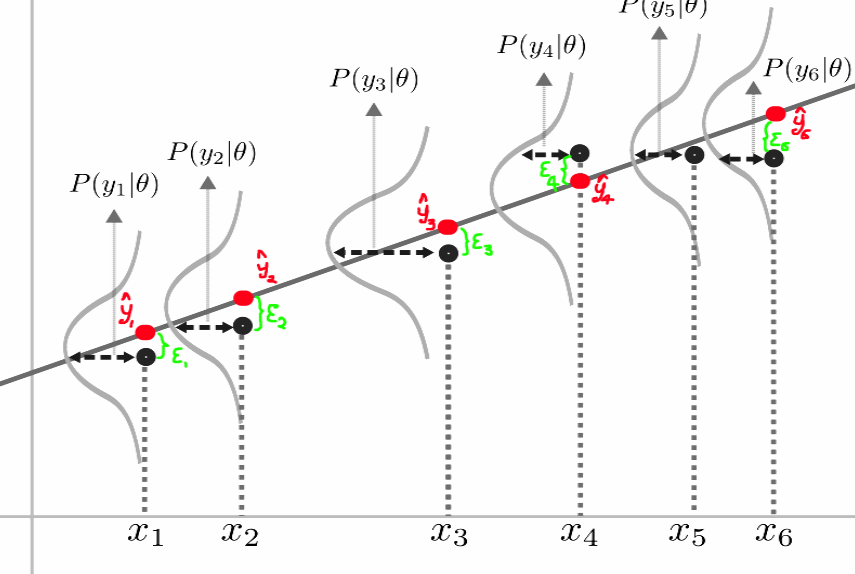

$\rightarrow\space $Likelihood for linear regression in general:<br><br>
<font size="4">
    <center>
        $L(XW, \sigma^2|X, Y) = \prod_{i=1}^{N}P(y_i|W^Tx_i, \sigma^2)$
    <br><br>
        $L(XW, \sigma^2|X, Y) = \prod_{i=1}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i - W^Tx_i)^2}{2\sigma^2}}$
    <br><br>
        $L(XW, \sigma^2|X, Y) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n e^{-\frac{\sum_{i = 1}^{N}(y_i - W^Tx_i)^2}{2\sigma^2}}$
    <br><br>
        $L(XW, \sigma^2|X, Y) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n e^{-\frac{(Y - XW)^2}{2\sigma^2}}$
    <br><br>
        $L(XW, \sigma^2|X, Y) = (\frac{1}{\sqrt{2\pi\sigma^2}})^n e^{-\frac{(Y - XW)^T(Y - XW)}{2\sigma^2}} \tag{3}$
    </center></font>

Take the natural logarithms from both sides of equation (3),<br><br>
<font size="4">
    <center>
        $ln(L(XW, \sigma^2|X, Y)) = -\frac{N}{2}ln(2\pi) -\frac{N}{2}ln(\sigma^2) -\frac{(Y - XW)^T(Y - XW)}{2\sigma^2} \tag{4}$
    <br><br>
    </center>
</font>
To obtain the optimal values in W, taking the 1st-order derivative of equation (4) and set it equals to 0, <br><br>
<font size="4">
    <center>
        $\frac{\partial ln(L(XW, \sigma^2|X, Y))}{\partial W} = 0$ <br><br>
        $\leftrightarrow \frac{1}{2\sigma^2}(0 - 2X^TY + 2X^TXW) = 0$ <br><br>
        $\leftrightarrow W = (X^TX)^{-1} X^T Y$ <br><br>
    </center>
</font>

- However, it is unclear that this computed weight matrix is able to fit well with testing data (there might be the case that it is over-fitted with the training data since the amount of training data is relatively small)
- On top of that, different weight matrices by calculating based on different observations raised many questions:<br>
I. Are they the true values of weight matrix after all ?<br>
II. How confident the estimated values of weight matrix are the true values of that?<br>
III. Will the estimated values of weight matrix continue to change if the data is further increased ?

=> These are the challenges of frequentist approach since it doesn't incorporate the valuable insights or the beliefs or simply the past experiences to increase the accuracy of hypothesis test.

## Bayesian approach

Link: https://wso2.com/blog/research/part-one-introduction-to-bayesian-learning

Bayesian learning in short, is the combination of frequentist method (determine the probability of an event natively based on recent observations) and the prior beliefs or past experiences. In other words, the probability of an event are determined by adjusting the prior beliefs according to the recent observations.

<font size="4">Bayes' theorem: 
$P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} \tag{5}$
</font>
where:<br><br>
$\quad\quad\quad \theta$ is the hypothesis<br><br>
$\quad\quad\quad X$ is the evidence<br><br>
$\quad\quad\quad P(\theta)$ is the prior probability of hypothesis $\theta$ being true before applying Bayes' theorem<br><br>
$\quad\quad\quad P(X|\theta)$ is the likelihood or conditional probability of the evidence given hypothesis<br><br>
$\quad\quad\quad P(X)$ is the probability of evidence or data. It can be calcuated as the summation (or integral) of the probabilities of all possible hypotheses weighted by the likelihood<br><br>
<font size="4">
$P(X) = \sum_{\theta\in\Theta}P(X|\theta)P(\theta) = \int_{\theta}P(X|\theta)P(\theta)d\theta \tag{6}$
</font>

=> According to equation (5), the most probable hypothesis can be determined by maximizing $P(\theta|X)$ or to choose the hypothesis that can maximize the probability $P(\theta|X)$ || posterior probability. This is so called <font size="4"> Maximum a Posteriori (MAP)</font>.

### Maximum a Posteriori for Linear Regression
Link: https://wiseodd.github.io/techblog/2017/01/05/bayesian-regression/<br>
Link: https://wso2.com/blog/research/part-two-linear-regression

Hypothesis function for the linear regression can be written as the same as equation (1)

Applying Bayes' theorem to define the posterior probability of the hypotheses $W, \tau, \sigma^2$ in equation (1) as follows,<br><br>
<font size="4">
    $\begin{equation} \tag{7}
   \underbrace{P(W, \tau, \sigma^2 | Y, X)}_{\text{posterior}} = \frac {   \underbrace{P(Y|W, \tau, \sigma^2, X)}_{\text{likelihood}}\underbrace{P(W, \tau, \sigma^2)}_{\text{prior}} } {\underbrace{P(Y|X)}_{\text{evidence}}}
  \end{equation}$
</font><br><br>
Calculating the evidence of equation (7), all the hypotheses must be taken into account like equation (6) to have a complete description about evidence -> This is the hardness in computation of MAP. Luckily, this is just the marginal distribution and does not depend on $\theta$ and thus can be seen as a normalization constant for equation (7). <br>
=> The simplified version of equation (7), which is also rewritten specific to linear regression model can be described as follows, <br><br>
<center>
<font size="4">
    $\begin{equation}
    P(W, \tau, \sigma^2 | Y, X) \propto P(Y|X.W + \tau, \sigma^2)P(W, \tau, \sigma^2)
\end{equation}$<br><br>
    $\leftrightarrow\space \propto P(Y|X.W + \tau, \sigma^2)P(W)P(\tau)P(\sigma^2)\quad$ (these hypotheses are independent)<br><br>
    $\leftrightarrow\space \propto \prod_{i=1}^{N}P(y_i|W^T.x_i + \tau, \sigma^2)P(W)P(\tau)P(\sigma^2) \tag{8}\quad$ <br><br>
</font>
</center>
where:<br>
$\quad\quad\quad P(y_i|W^T.x_i + \tau, \sigma^2) \sim N(y_i|W^T.x_i + \tau, \sigma^2)$<br><br>
$\quad\quad\quad P(W) \sim N(W|\mu_1, \sigma^2_1)$<br><br>
$\quad\quad\quad P(\tau) \sim N(\tau|\mu_2, \sigma^2_2)$<br><br>
$\quad\quad\quad P(\sigma^2) \sim HC(\sigma^2|\beta)$<br><br>

=> MAP of this linear regression: <br><br>
<font size="4">
    <center>
        $\hat{\theta}_{MAP} = argmax_{W, \tau, \sigma^2}P(W, \tau, \sigma^2|Y, X)$<br><br> $= argmax_{W, \tau, \sigma^2}N(Y|XW + \tau, \sigma^2)N(W|\mu_1, \sigma^2_1)N(\tau|\mu_2, \sigma^2_2)HC(\sigma^2|\beta)$
    </center>
</font>
where: <br>
$\quad\quad\quad\hat{\theta}_{MAP}$ = $(\hat{W}, \hat{\tau}, \hat{\sigma}^2)$

### Predictions from Bayesian models

Given a new independent value $\bar{x}_i$, we want to predict the outcome of new dependent variable $\bar{y}_i$ that have been trained with our previous data $D=X,Y$.<br>
=> The probability of new unseen variable $\bar{y}_i$ can be expressed as: <br><br>
<font size="4">
    <center>
        $P(\bar{y}_i | \bar{x}_i, D) = \int_{W} \int_{\tau} P(\bar{y}_i, W, \tau | \bar{x}_i, D) \mathrm{d}\tau\mathrm{d}W \quad$ law of total probability<br><br>
    </center>
    $\hskip{8cm}\propto \int_W \int_\tau P(\bar{y}_i | \bar{x}_i, W, \tau).P(W, \tau |D) \mathrm{d}\tau \mathrm{d}W \quad \text{chain rule}\\
    \hskip{7.8cm} = \int_W \int_\tau P(\bar{y}_i | \bar{x}_i, W, \tau).P(W|D).P(\tau|D) \mathrm{d}\tau  \mathrm{d}W \quad \text{independence assumption}$
</font>
where: <br>
$\quad\quad\quad P(W|D).P(\tau|D) = P(W|X,Y).P(\tau|X,Y)$ is actually the posterior distribution during training process<br><br>
$\quad\quad\quad P(\bar{y}_i | \bar{x}_i, W, \tau)$ is the likelihood by defined by Normal PDF

## Implementation

### Setting up problem

Assume that the data $X$ is normally distributed with its mean $= \mu$ (unknown) and its variance $(\sigma^2 = 1)$ -> The goal is to find $\mu$ that fits data the best<br>
=> The likelihood of the model can be represented as: <br><center>$X|\mu \sim N(X; \mu, 1)$</center> <br>
in which <center>$\mu \sim N(0, 1)$ (prior belief || parameter space)</center><br>
=> The posterior distribution can be described as follows: <br>
<center>$P(\mu|X) = N(X; \mu, 1)N(0, 1) \tag{*}$</center><br>
Based on equation (*), the posterior distribution can be computed to form an analytical solution (its parameters can be computed using mathematical derivation) since its prior and its likelihood are normal distributions -> posterior distribution is also a normal distribution => $\mu$ is conjugate


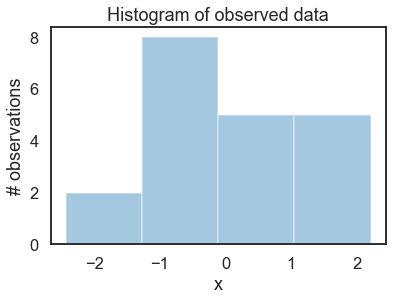

In [2]:
data = np.random.randn(20) # Generate some data normally centered at 0 and std.dev = 1
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

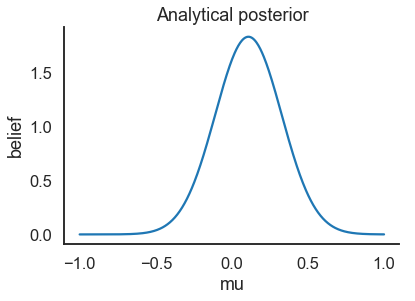

In [3]:
# Calculate parameters for posterior distribution based on mathematical derivation
def calc_posterior_analytical(data, mu_sample, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(mu_sample)

ax = plt.subplot()
mu_sample = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, mu_sample, 0., 1.)
ax.plot(mu_sample, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

However, in reality, there are many cases that the posterior distribution is the combination of many different types of distribution -> analytical solution is intractable (couldn't solve by hand easily). <br>=> Approximate the posterior distrubition by using <font size="3">Markov chain Monte Carlo </font>(constructing a Markov chain to do Monte Carlo simulation)

### Markov chain Monte Carlo (MCMC)

#### From scratch implementation using Metropolis Sampler

In [4]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    # mu_current will be updated in each iteration of Monte Carlo simulation if it meets the criteria
    mu_current = mu_init
    # keep track of mu's values of posterior distribution in all iterations 
    posterior = [mu_current]
    for i in range(samples):
        # Space for mu' values
        # As already discussed about space of that values is going to be normally distributed
        # In this example, the method used to sample a value of mu is Metropolis sampler 
        # Metropolis sampler is a very dumb method and just takes a sample centered around its current value follow normal distribution
        # unlike what we expected that mu's sample should be drawn from N(0, 1)
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        # If p_proposal / p_current > 1, it means that the likelihood of proposal mu can fits the data way more than that of current mu
        # -> p_current := p_proposal
        # Elseif 0 < p_proposal / p_current < 1, likelihood of proposal mu fits the data less than that of current mu
        # -> there is a percentage to decide whether to assign current mu to proposal mu (percentage == p_proposal / p_current)
        # Else p_proposal / p_current == 0 -> reject p_proposal
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return np.array(posterior)

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))
    fig.suptitle('Iteration %i' % (i + 1))
    # According to 3 sigma rule, 99.7% data lies between -3 * std.dev and 3 * std.dev
    mu_all_values = np.linspace(-3 * mu_prior_sd, 3 * mu_prior_sd, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(mu_all_values)
    ax1.plot(mu_all_values, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2., color='black'))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(mu_all_values)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(mu_all_values, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2., color='black'))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, mu_all_values, mu_prior_mu, mu_prior_sd)
    ax3.plot(mu_all_values, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2., color='black'))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

#### Visualization of MCMC steps

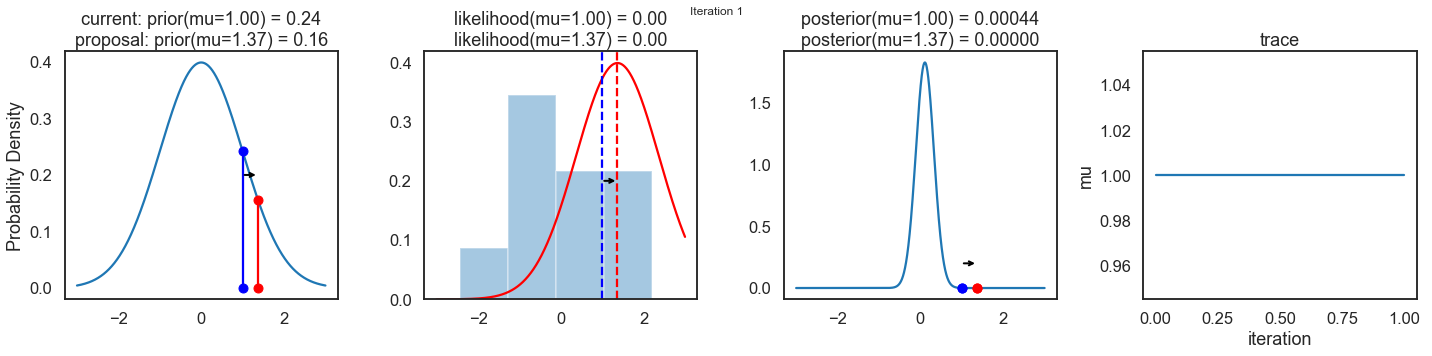

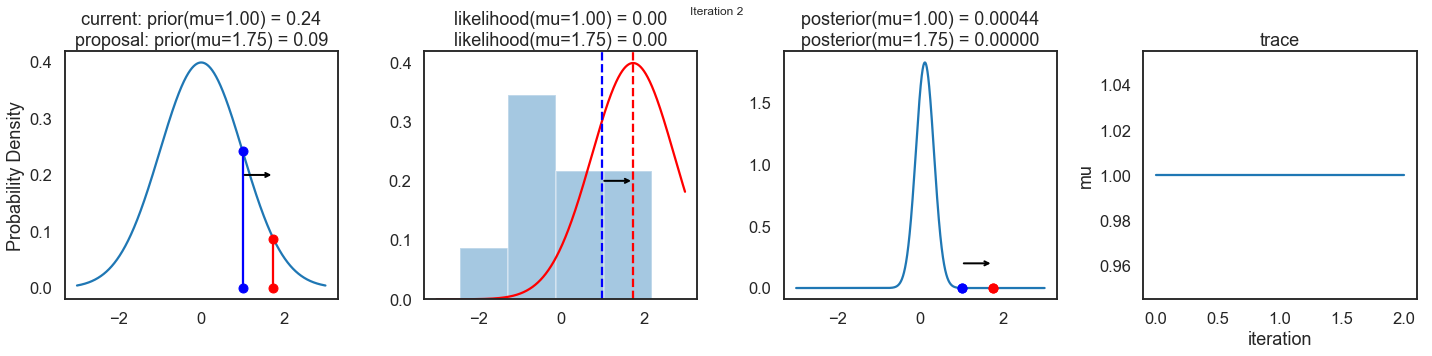

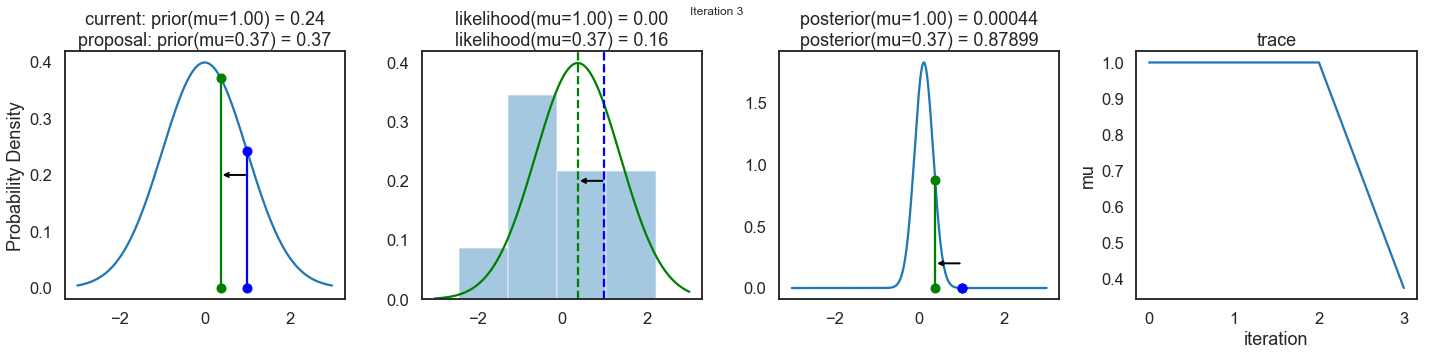

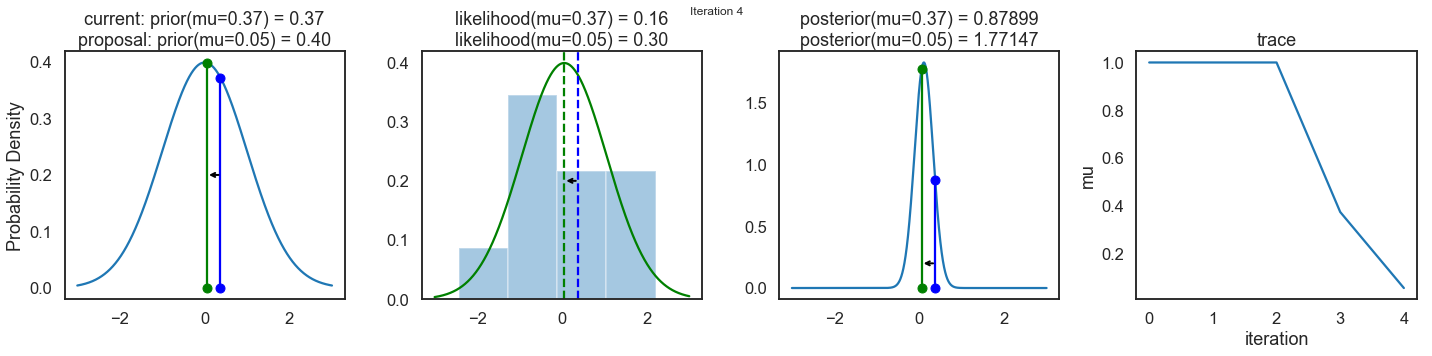

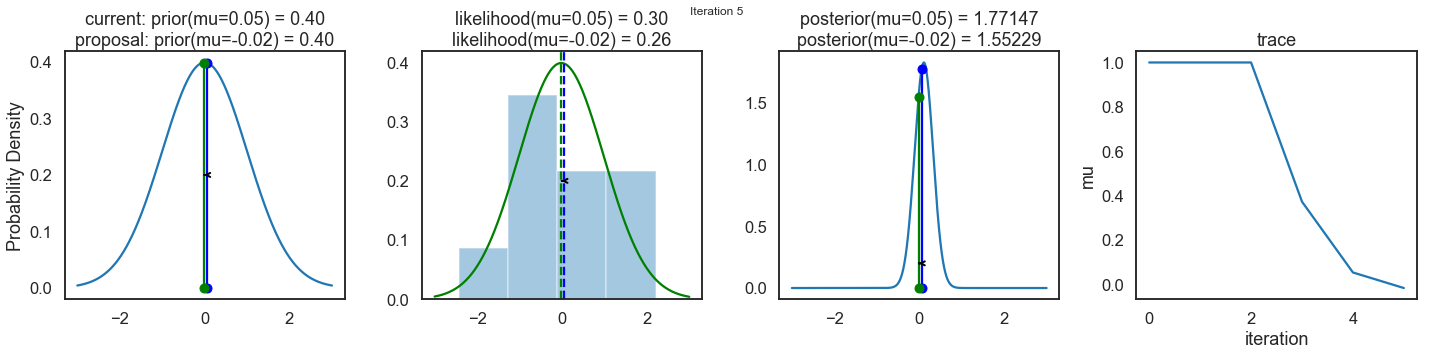

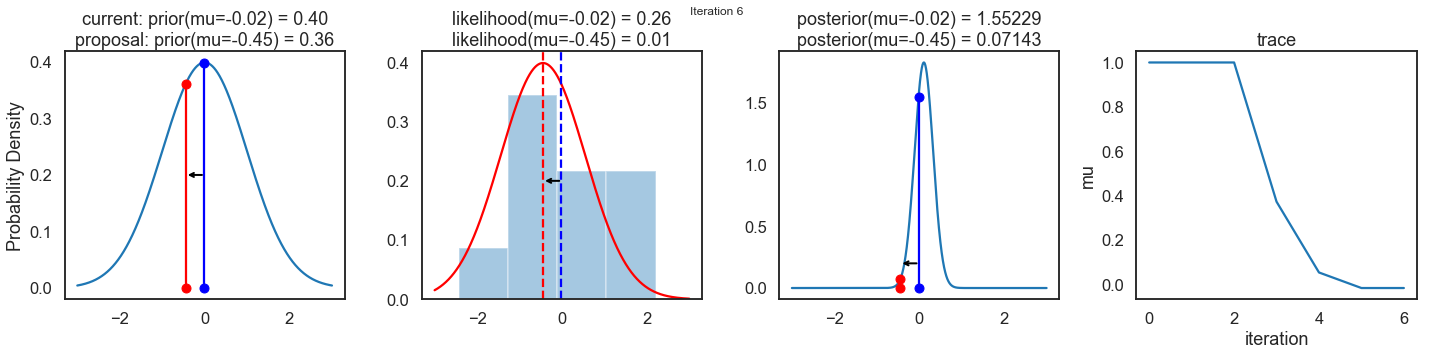

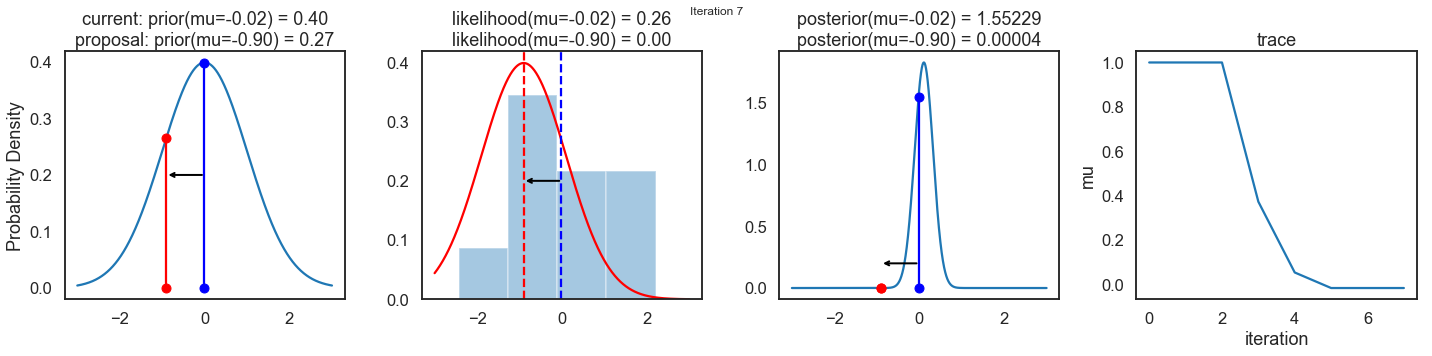

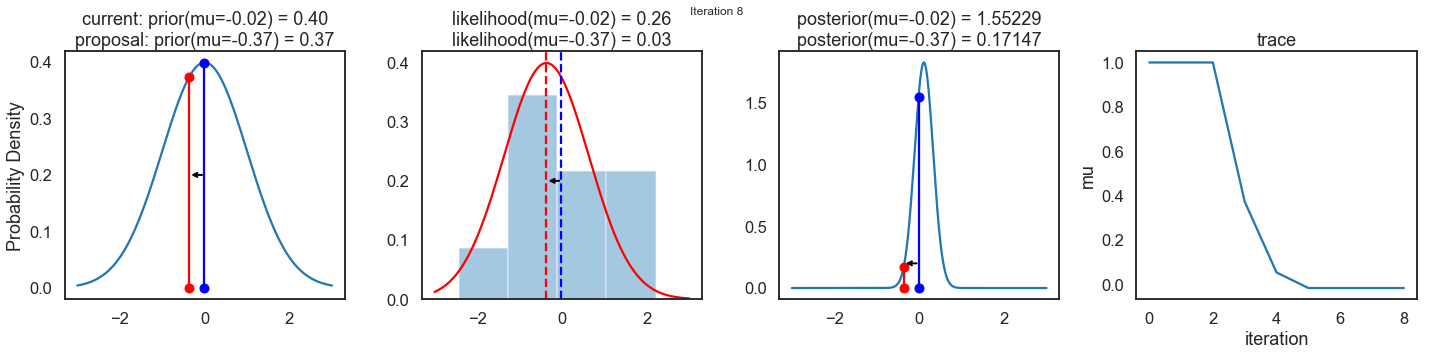

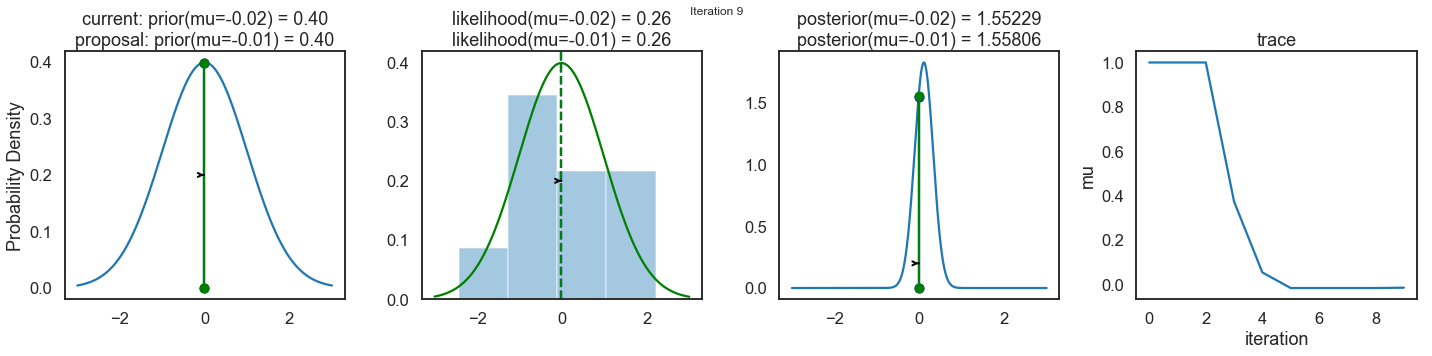

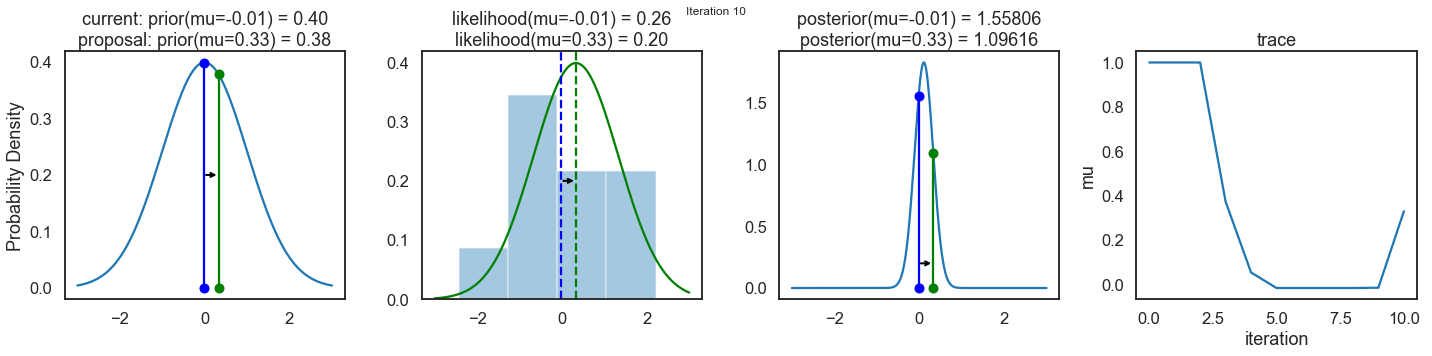

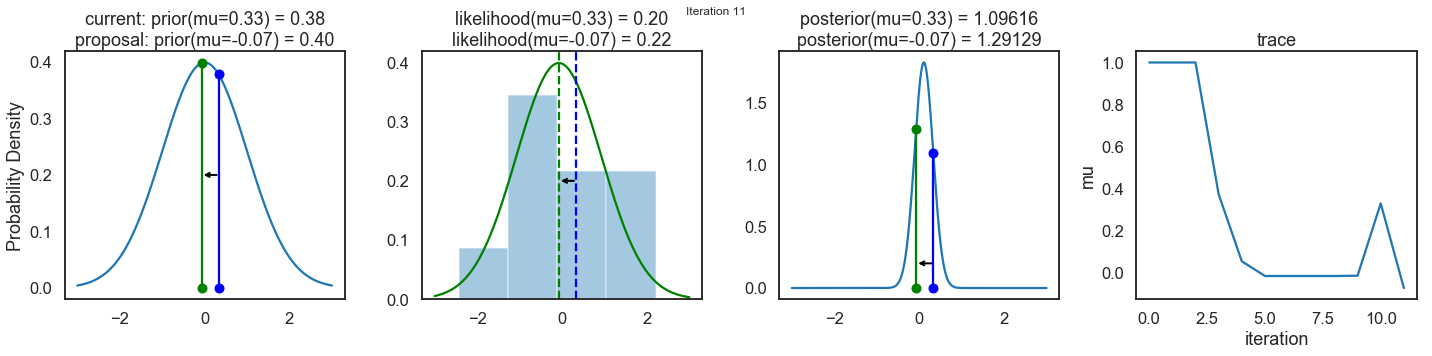

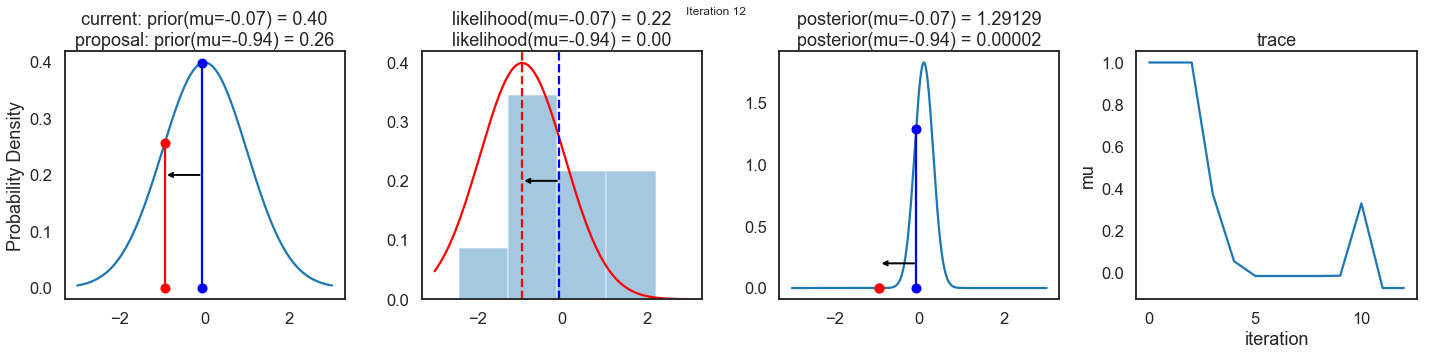

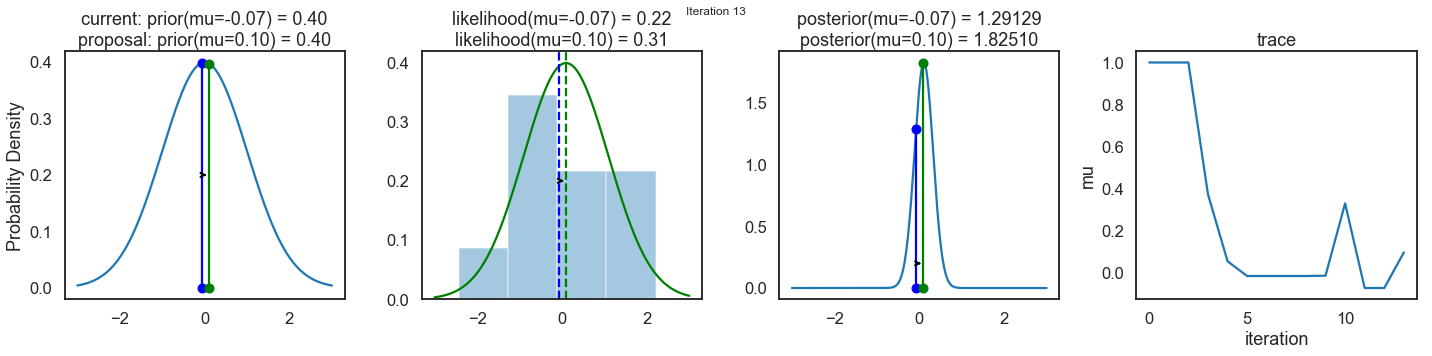

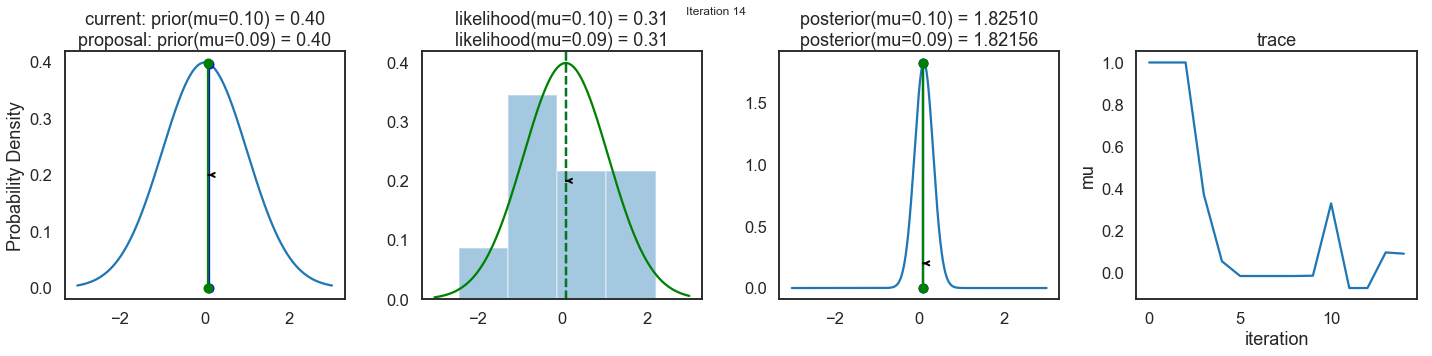

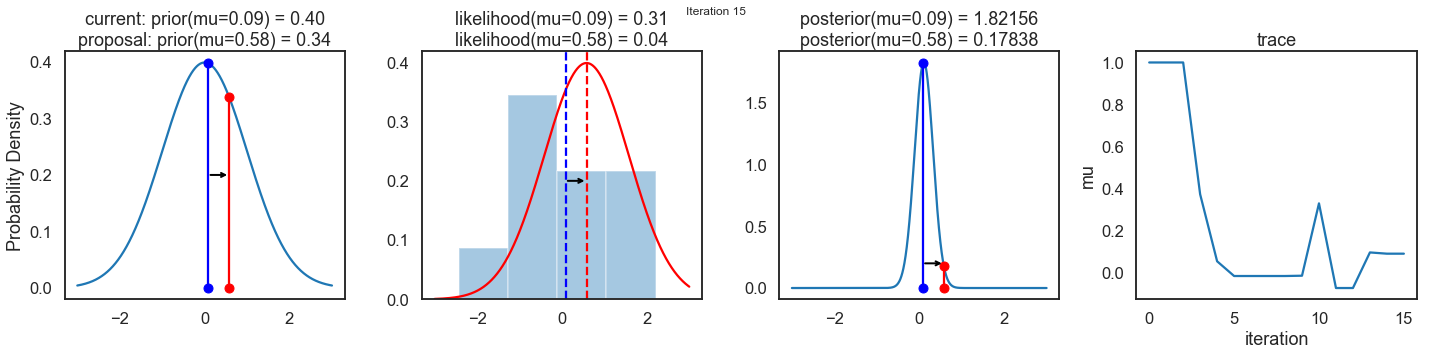

In [5]:
# Initialize mu with a random value
# This var will also be updated during Monte Carlo simulation process
mu_init = 1.0

sampler(data, samples=15, mu_init=mu_init, plot=True);


In [6]:
# Draw 15000 samples from posterior distribution
posterior = sampler(data, samples=15000, mu_init=1.0)

array([1.        , 1.        , 1.        , 0.60096863, 0.60096863,
       0.60096863, 0.21461428, 0.21461428, 0.21461428, 0.21461428])

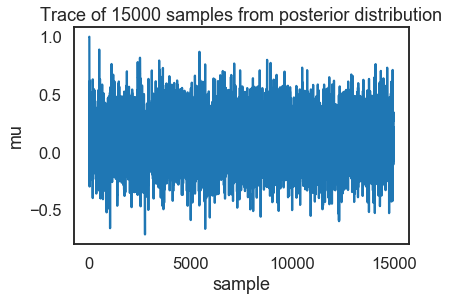

In [7]:
# Plot samples drawn from posterior distribution (usually called the trace)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu', title='Trace of 15000 samples from posterior distribution');
posterior[0:10]

<b> Critical thinking: How to get the approximation of the posterior distribution?</b>

<b> Answer: Take the histogram of the trace above</b>

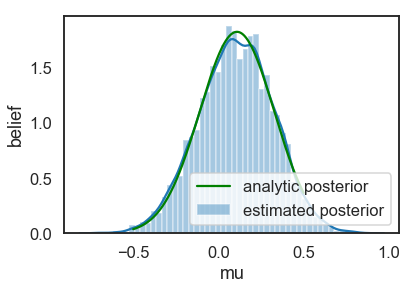

In [8]:
ax = plt.subplot()

# Only plot the samples from sample 500th to the rest is because 
# the initial samples from the first few iterations are actually not the true sample from posterior distribution
# -> this is so called "burn-in" period
sns.distplot(posterior[500:], ax=ax, label='estimated posterior')

# The reason why mu's values of posterior dist are from -.5 to .5 is because
# the sigma || std.dev of posterior distribution can be calculated by hand based on
# the sigma of prior and likelihood
x = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, x, 0, 1)
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');
ax.legend();

#### Pymc3 implementation using No-U-Turn Sampler

In [9]:
size = 100  # no of data samples
true_intercept = 0.5  # intercept of the regression line
true_slope = 2  # slop (coefficient) of x

x = np.linspace(0, 1, size)  # generate some random values for x in the given range (0,1)

# performs simple linear regression
# y = a + b*x
true_regression_line = true_intercept + true_slope * x

# we can't use true regression values for training the model
# therefore, add some random noise
y = true_regression_line + np.random.normal(scale=.3, size=size)

# split the data points into train and test split
x_train, x_test, y_train, y_test, true_y1, true_y2 = train_test_split(x, y, true_regression_line)

# we use a shared variable from theano to feed the x values into the model
# this is need for PPC
# when using the model for predictions we can set this shared variable to x_test
shared_x = shared(x_train)

# training the model
# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:
    # Define priors
    x_coeff = pm.Normal('x', 0, sd=20)  # prior for coefficient of x
    intercept = pm.Normal('Intercept', 0, sd=20)  # prior for the intercept
    sigma = pm.HalfCauchy('sigma', beta=10)  # prior for the error term of due to the noise

    mu = intercept + tt.dot(shared_x, x_coeff)  # represent the linear regression relationship

    # Define likelihood
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=y_train)

    # Inference!
    trace = pm.sample(1000, njobs=1)  # draw 3000 posterior samples using NUTS sampling


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, Intercept, x]
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 916.00it/s]
The acceptance probability does not match the target. It is 0.8862218755749837, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.879640797533295, but should be close to 0.8. Try to increase the number of tuning steps.


D:\Program Files\Miniconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  after removing the cwd from sys.path.
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1526.01it/s]



 MSE of simple linear regression using bayesian : 0.09695323793982379



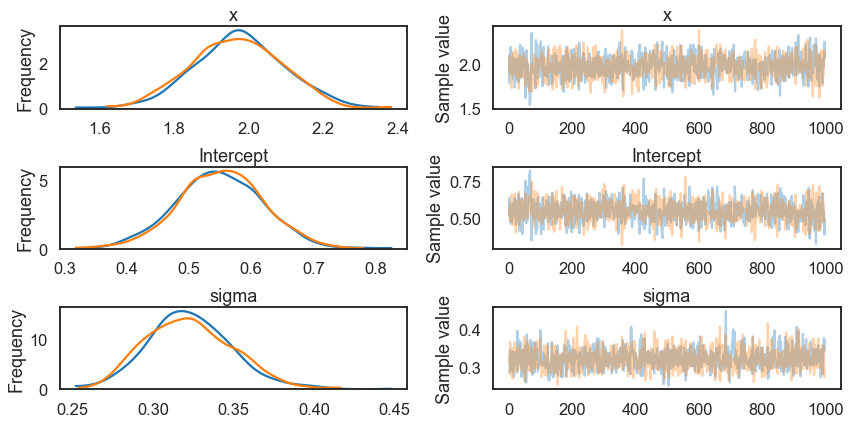

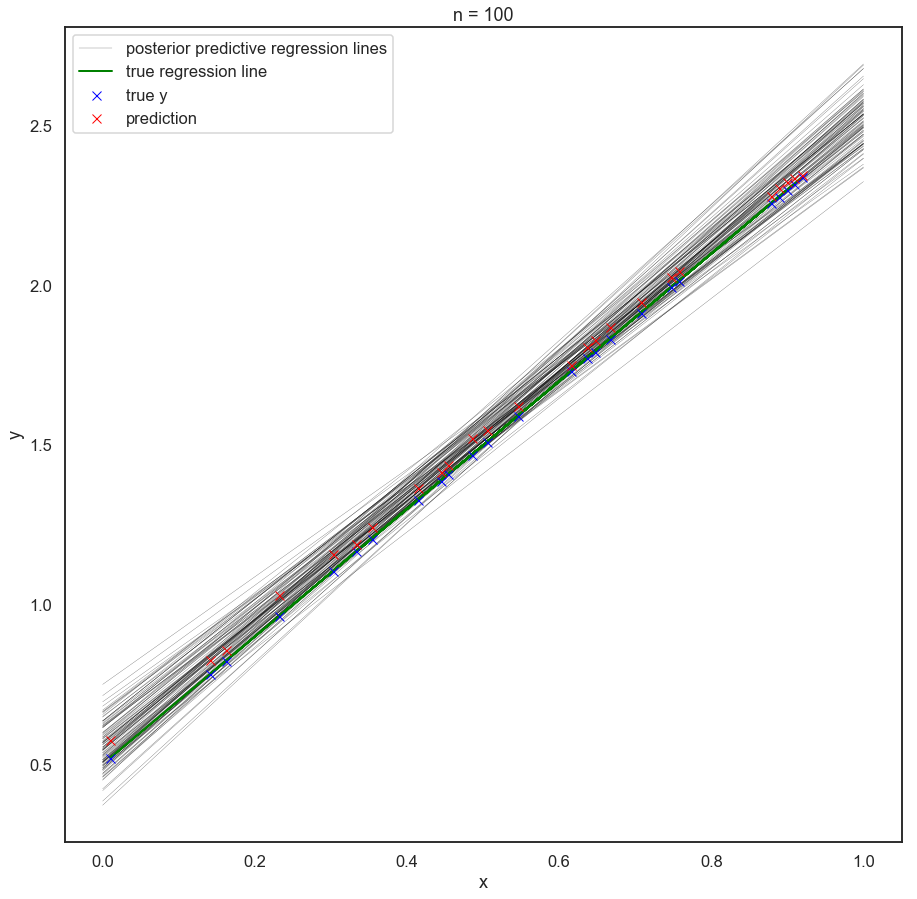

In [10]:
# predicting the unseen y values
# uses posterior predictive checks (PPC)
shared_x.set_value(x_test)  # let's set the shared x to the test dataset
ppc = pm.sample_ppc(trace, model=model, samples=1000)  # performs PPC
predictions = ppc['y'].mean(axis=0)  # compute the mean of the samples draws from each new y

# now you can measure the error
print("\n MSE of simple linear regression using bayesian : {0}\n".format(mean_squared_error(y_test, predictions)))

# plot the traceplot
pm.traceplot(trace)

# let's plot the regression lines
fig = plt.figure(figsize=(15, 15))

pm.plot_posterior_predictive_glm(trace, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x_test, true_y2, label='true regression line', lw=2., c='g')

plt.plot(x_test, true_y2, 'x', label='true y', color="blue")
plt.plot(x_test, predictions, 'x', label='prediction', color="red")
plt.title('n = {0}'.format(size))
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')

plt.show()